In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from optims.CMA_ES import CMA_ES

np.random.seed(42)

In [2]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      return (np.cos(x**2/2) + x/5 + 1).sum()

In [3]:
m_0 = np.random.uniform(0, 5, 1)
m_0

array([1.87270059])

In [4]:
def create_sim(k=3, save_fig=None):
  optim = CMA_ES(np.array([(0, 5)]), m_0, num_generations=10, lambda_=10)
  _best, _xs, _fs = optim.optimize(Fun())

  xs = []
  for mode in optim.modes:
    for _ in range(50):
      xs.append(np.random.multivariate_normal(mode[0], mode[1]))
  xs = np.array(xs).flatten()

  plt.hist(xs, density=True, bins=50, label="CMA histogram")

  # sns.kdeplot(xs, label="CMA PDF")

  f = lambda x : np.cos(x**2/2) + x/5 + 1

  integral = quad(lambda x : np.exp(-k*f(x)), 0, 5)[0]
  m_k = lambda x : np.exp(-k*f(x)) / integral

  x = np.linspace(0, 5, 500)
  plt.plot(x, f(x), label="$f$")
  plt.plot(x, m_k(x), label="$m^{(k)}$")

  plt.xlim(0, 5)
  plt.legend()
  plt.title(f"k = {k}")

  if save_fig != None:
    plt.savefig(save_fig, dpi=300, bbox_inches="tight")

  plt.show()

  return optim


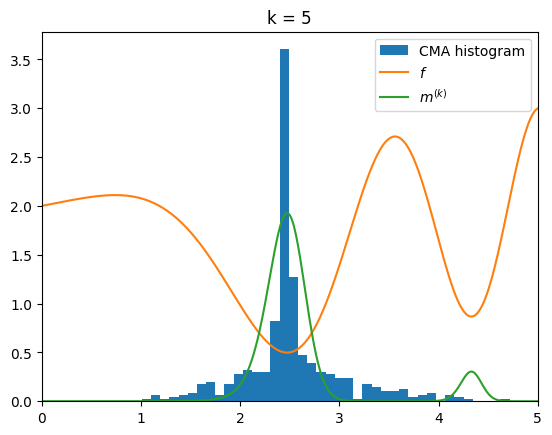

In [5]:
optim = create_sim(k=5)

In [6]:
optim.modes

[(array([2.3206707]), array([[0.61501299]])),
 (array([2.87308024]), array([[1.02611704]])),
 (array([2.33079107]), array([[0.46792381]])),
 (array([2.62305189]), array([[0.25210188]])),
 (array([2.38068152]), array([[0.14115041]])),
 (array([2.42361141]), array([[0.03534027]])),
 (array([2.45804523]), array([[0.00724067]])),
 (array([2.45990558]), array([[0.00216981]])),
 (array([2.47395031]), array([[0.00113912]])),
 (array([2.47123166]), array([[0.00019717]]))]